In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "EDU"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/baseline

Average verified rate: 0.9442889161902515

Average of error rates: 0.06808438818565402

Total token count: 347561



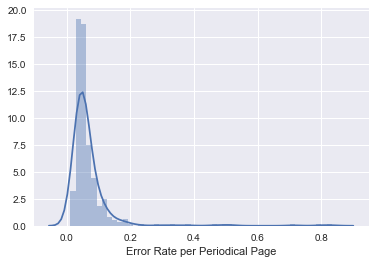

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 20 )

[('ñ', 1190),
 ('-', 509),
 ('¥', 449),
 (')', 292),
 ('tion', 271),
 ("'", 232),
 ('e', 223),
 ('m', 187),
 ('w', 187),
 ('con-', 159),
 ('*', 148),
 ('t', 145),
 ('in-', 140),
 ('d', 132),
 ('(', 120),
 ('g', 119),
 ('ment', 116),
 ('re-', 105),
 ('f', 98),
 ('be-', 97),
 ('educa-', 96),
 ('com-', 89),
 ('r', 88),
 ('n', 86),
 ('u', 81),
 ('tions', 81),
 ('edu-', 80),
 ('ex-', 77),
 ('co', 71),
 ('de-', 68),
 (']', 61),
 ('sub-', 59),
 ('pro-', 56),
 ('tional', 50),
 ('<', 48),
 ('/', 42),
 ('im-', 42),
 ('per-', 41),
 ('--', 41),
 ('dis-', 40),
 ('<<', 39),
 ('ments', 38),
 ('_', 36),
 ('ñthe', 35),
 ('un-', 35),
 ('pre-', 34),
 ('inter-', 33),
 ('x', 31),
 ('chil-', 31),
 ('ac-', 29),
 ('dren', 29),
 ('stu-', 26),
 ('ent', 26),
 ('ical', 26),
 ('cator', 26),
 ('ô', 26),
 ('en-', 25),
 ('ence', 25),
 ('(fig', 25),
 ('an-', 25),
 ('some-', 25),
 ('ques-', 25),
 ('k', 25),
 ('knowl-', 24),
 ('ture', 24),
 ('ber', 23),
 ('pos-', 23),
 ('train-', 23),
 ('num-', 22),
 ('¥¥', 22),
 ('ad-'

## Check for special character use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:100]

[('ñ', 1190),
 ('¥', 449),
 (')', 292),
 ('*', 148),
 ('(', 120),
 (']', 61),
 ('<', 48),
 ('/', 42),
 ('<<', 39),
 ('_', 36),
 ('ñthe', 35),
 ('ô', 26),
 ('(fig', 25),
 ('¥¥', 22),
 ('ã', 20),
 ('ñno', 19),
 ('+', 19),
 ('(see', 18),
 ('¡', 16),
 ('=', 16),
 ('(to', 13),
 ('(the', 13),
 ('[this', 13),
 ('\\', 12),
 ('address)', 12),
 ('**', 11),
 ('ñand', 10),
 ('(with', 10),
 ('[the', 10),
 ('the¥', 9),
 ('ñed', 8),
 ('months)', 8),
 ('ña', 8),
 ('~~', 8),
 ('[', 8),
 ('¥¥¥', 7),
 ('(a', 7),
 ('(continued', 7),
 ('(from', 7),
 ('ñi', 7),
 ('-*', 7),
 ('¥the', 7),
 ('#', 7),
 ('[from', 6),
 ('to¥', 6),
 ('¥-', 6),
 ('ñthat', 6),
 ("¥'", 5),
 ('%', 5),
 ('ñit', 5),
 ('(after', 5),
 ('(concluded', 5),
 ('•', 5),
 ('ñin', 5),
 ('ñthis', 5),
 ('¥¥¥¥¥', 5),
 ("'¥", 5),
 ('ñif', 5),
 ('(cal', 5),
 ('ñen', 5),
 ('¥¥¥¥¥¥¥¥', 4),
 ('(we', 4),
 ('[we', 4),
 ('(in', 4),
 ('(i', 4),
 ('(not', 4),
 ('`', 4),
 ('(which', 4),
 ('±', 3),
 ('a¥', 3),
 ('and¥', 3),
 ('//', 3),
 ('chapters)', 3),
 ("'ñ"

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"’", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction1

Average verified rate: 0.9554578673907311

Average of error rates: 0.05515611814345992

Total token count: 345089



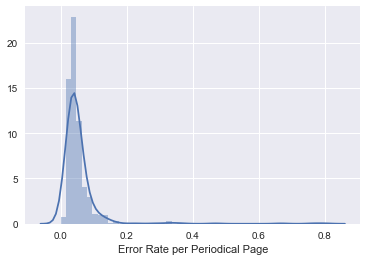

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 583),
 ('tion', 272),
 ("'", 267),
 ('e', 232),
 ('w', 193),
 ('m', 191),
 ('con-', 159),
 ('t', 156),
 ('in-', 141),
 ('d', 133),
 ('g', 120),
 ('ment', 116),
 ('re-', 105),
 ('f', 103),
 ('be-', 97),
 ('educa-', 96),
 ('r', 96),
 ('com-', 90),
 ('n', 88),
 ('u', 81),
 ('tions', 81),
 ('edu-', 80),
 ('ex-', 77),
 ('co', 72),
 ('de-', 68),
 ('sub-', 59),
 ('pro-', 56),
 ('--', 53),
 ('tional', 50),
 ('im-', 42),
 ('per-', 41),
 ('dis-', 40),
 ('ments', 38),
 ('un-', 35),
 ('pre-', 35),
 ('inter-', 33),
 ('x', 32),
 ('chil-', 31),
 ('ac-', 29),
 ('dren', 29),
 ('k', 27),
 ('ical', 26),
 ('stu-', 26),
 ('ent', 26),
 ('cator', 26),
 ('ques-', 26),
 ('an-', 25),
 ('some-', 25),
 ('en-', 25),
 ('ence', 25)]

## Correction 2 -- Fix line endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction2

Average verified rate: 0.9780048681852029

Average of error rates: 0.03328691983122364

Total token count: 339757



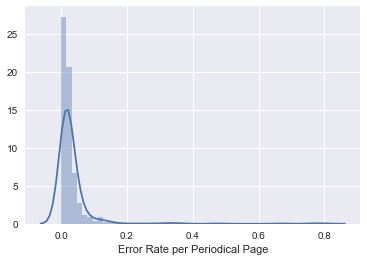

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 576),
 ("'", 267),
 ('e', 231),
 ('w', 193),
 ('m', 191),
 ('t', 156),
 ('d', 133),
 ('g', 120),
 ('f', 103),
 ('r', 96),
 ('n', 88),
 ('u', 81),
 ('co', 72),
 ('--', 53),
 ('x', 32),
 ('k', 27),
 ('cator', 23),
 ('th', 22),
 ('edu-', 17),
 ('ga', 15),
 ('z', 15),
 ("''", 13),
 ('il', 13),
 ('money-order', 13),
 ("'the", 12),
 ('ex', 12),
 ('al', 12),
 ('mt', 12),
 ('educa-', 12),
 ('mm', 11),
 ('tion', 11),
 ('ti', 11),
 ('postage-stamps', 11)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction3

Average verified rate: 0.9816653529875417

Average of error rates: 0.02906540084388186

Total token count: 340012



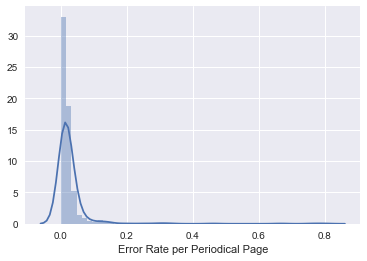

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 282),
 ('e', 236),
 ('w', 193),
 ('m', 192),
 ('t', 164),
 ('d', 133),
 ('g', 122),
 ('co', 121),
 ('f', 106),
 ('r', 104),
 ('n', 90),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('th', 24),
 ('cator', 23),
 ('-', 18),
 ('edu', 16),
 ('ga', 15),
 ('z', 15),
 ('re', 14),
 ("''", 14),
 ('educa', 13),
 ('ti', 13),
 ('il', 13),
 ("'the", 12),
 ('al', 12),
 ('mt', 12),
 ('mm', 11),
 ('tion', 11),
 ('mc', 11)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 3:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction4

Average verified rate: 0.9823477856794132

Average of error rates: 0.02837130801687764

Total token count: 340014



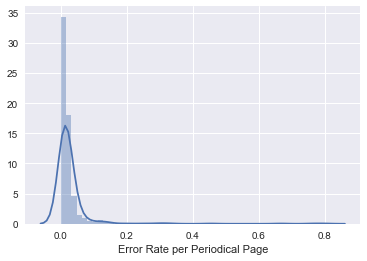

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 263),
 ('e', 236),
 ('m', 193),
 ('w', 193),
 ('t', 170),
 ('d', 134),
 ('g', 122),
 ('co', 121),
 ('f', 106),
 ('r', 106),
 ('n', 91),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('th', 24),
 ('cator', 23),
 ('-', 18),
 ('edu', 16),
 ('ga', 15),
 ('z', 15),
 ('re', 14),
 ('il', 14),
 ('educa', 13),
 ("''", 13),
 ('ti', 13),
 ('mt', 13),
 ('al', 12),
 ('mm', 11),
 ('tion', 11),
 ('mc', 11)]

## Correction 5 -- Rejoin Burst Words

In [28]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction5

Average verified rate: 0.9823393780402444

Average of error rates: 0.02837974683544304

Total token count: 340022



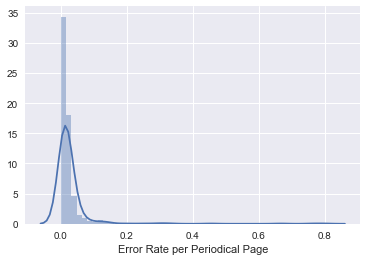

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 263),
 ('e', 236),
 ('m', 193),
 ('w', 193),
 ('t', 170),
 ('d', 134),
 ('g', 122),
 ('co', 121),
 ('f', 106),
 ('r', 106),
 ('n', 91),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('th', 24),
 ('cator', 23),
 ('-', 18),
 ('edu', 16),
 ('ga', 15),
 ('z', 15),
 ('re', 14),
 ('il', 14),
 ('educa', 13),
 ("''", 13),
 ('ti', 13),
 ('mt', 13),
 ('al', 12),
 ('mm', 11),
 ('tion', 11),
 ('mc', 11)]

## Check Correction 6 -- Rejoin Split Words I

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction6

Average verified rate: 0.9828301431605952

Average of error rates: 0.027658227848101267

Total token count: 339898



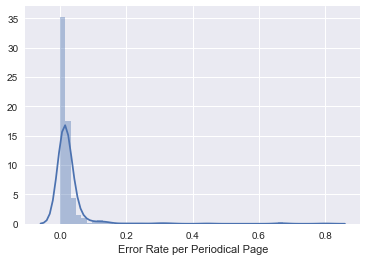

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 263),
 ('e', 231),
 ('m', 193),
 ('w', 193),
 ('t', 168),
 ('d', 134),
 ('g', 122),
 ('f', 106),
 ('r', 104),
 ('n', 91),
 ('co', 88),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('th', 19),
 ('-', 18),
 ('ga', 15),
 ('z', 15),
 ('il', 14),
 ("''", 13),
 ('mt', 13),
 ('re', 11),
 ('mm', 11)]

## Correction 7 -- Rejoin Split Words II

In [34]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 7

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction7

Average verified rate: 0.9829804263132496

Average of error rates: 0.027402953586497893

Total token count: 339844



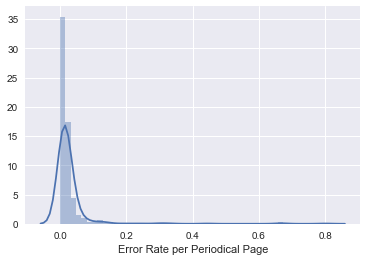

In [35]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [36]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 263),
 ('e', 231),
 ('w', 193),
 ('m', 191),
 ('t', 166),
 ('d', 134),
 ('g', 119),
 ('f', 106),
 ('r', 103),
 ('n', 91),
 ('co', 87),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('-', 18),
 ('th', 16),
 ('ga', 15),
 ('z', 15),
 ('il', 14),
 ("''", 13),
 ('mt', 13),
 ('mm', 11)]

## Review Remaining Errors

In [37]:
reports.docs_with_high_error_rate(summary)

[('EDU18970901-V01-03,04-page33.txt', 0.8),
 ('EDU18970901-V01-03,04-page37.txt', 0.667),
 ('EDU18970901-V01-03,04-page34.txt', 0.667),
 ('EDU18981201-V03-04-page3.txt', 0.444),
 ('EDU18981201-V03-04-page1.txt', 0.333),
 ('EDU18980901-V03-01-page1.txt', 0.308),
 ('EDU18980601-V02-06-page1.txt', 0.297),
 ('EDU18990401-V03-08-page1.txt', 0.244)]

In [38]:
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

In [41]:
# utilities.open_original_docs(doc_keys, directories['cycle'])

Errors are from three periodicals. Most are image heavy pages that were scanned sideways. Given how few docs have high error rates, title is looking great.

In [40]:
reports.long_errors(errors_summary, min_length=17)[:100]

(['eachoftehesesubscrmiptionsfortheextra',
  'much-to-be-desired',
  'concomitantdissipation',
  'compulsory-education',
  'hyper-sensitiveness',
  'ttttttttttttttttttttttttttttttttttttttttttttttttttt',
  'silentlyarticulated',
  'majestatsbeleidigung',
  'carefully-observed',
  'chemico-physiological',
  'nord-stjarneordnarnes',
  'ttttttttttttttttttti',
  'branchesofbeechasseeninspring',
  'nord-stjiirneordnames',
  'self-forgetfulness',
  'christianeducatorand',
  'stkiernrotronbcera',
  'thegreatestquestion',
  'experience-modifications',
  'lieutenant-colonel',
  'lieutenant-general',
  'nimittittimmtiimmiimittittimmmiimmtiimmttimmtimititititimittitimittimm',
  'yearlysubscription',
  'self-glorification',
  'psycho-physiological'],
 17)

## Correction 8 -- Remove long error tokens

In [43]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    sub_list = ["m|M", "t|T"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

EDU18980901-V03-01-page27.txt: [('TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT', ' ')]
EDU18980901-V03-01-page32.txt: [('NIMITTITTIMMTIIMMIIMITTITTIMMMIIMMTIIMMTTIMMTIMITITITITIMITTITIMITTIMM', ' '), ('NIMITTITTIMMTIIMMIIMITTITTIMMMIIMMTIIMMTTIMMTIMITITITITIMITTITIMITTIMM', ' ')]
EDU18981001-V03-02-page29.txt: [('TTTTTTTTTTTTTTTTTTTI', ' ')]
EDU18981101-V03-03-page29.txt: [('"TrrITTTTTTITTTTTT', ' ')]
EDU18990101-V03-05-page19.txt: [('WttftttittifZ', ' ')]


## Correction 9 -- Separate Squashed Words

In [45]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

EDU18980601-V02-06-page31.txt: [('YEARLYSUBSCRIPTION', 'YEARLY SUBSCRIPTION')]
EDU18981001-V03-02-page2.txt: [('YEARLYSUBSCRIPTION', 'YEARLY SUBSCRIPTION')]
EDU18990301-V03-07-page2.txt: [('YEARLYSUBSCRIPTION', 'YEARLY SUBSCRIPTION'), ('CHRISTIANEDUCATORand', 'CHRISTIAN EDUCATOR and')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/EDU/correction9

Average verified rate: 0.9830069090523887

Average of error rates: 0.02737130801687764

Total token count: 339844



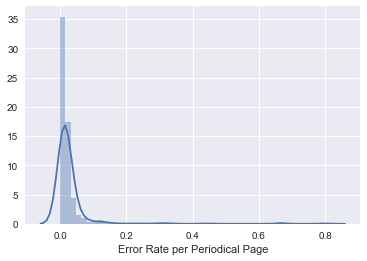

In [48]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [49]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 263),
 ('e', 231),
 ('w', 193),
 ('m', 191),
 ('t', 166),
 ('d', 134),
 ('g', 119),
 ('f', 106),
 ('r', 103),
 ('n', 91),
 ('co', 87),
 ('u', 81),
 ('x', 37),
 ('ex', 29),
 ('k', 27),
 ('-', 18),
 ('th', 16),
 ('ga', 15),
 ('z', 15),
 ('il', 14),
 ("''", 13),
 ('mt', 13),
 ('mm', 11)]